## Red Wines Review

In [2]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
red_wines.corr().replace().round(3).style.background_gradient('RdBu_r')

In [5]:
red_wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

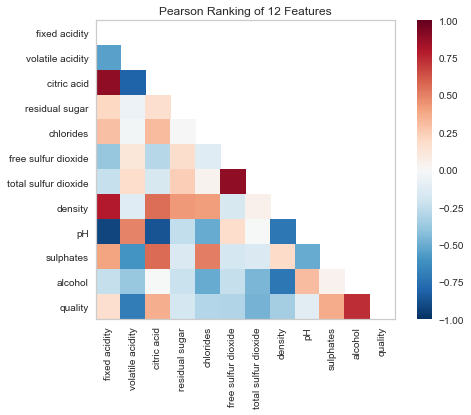

In [6]:
from yellowbrick.features import rank2d

visualizer = rank2d(red_wines.corr())

<AxesSubplot:ylabel='Frequency'>

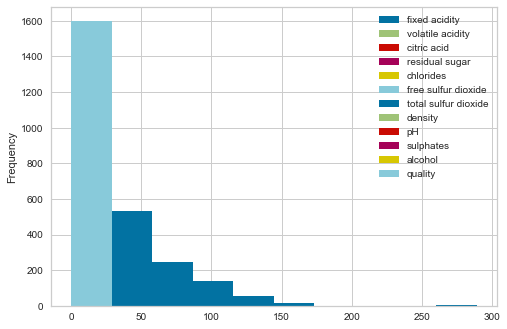

In [10]:
red_wines.plot.hist()

In [9]:
# Assign X & y

X = red_wines.drop(["quality"], axis=1)
y= red_wines.quality

In [11]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
582            11.7             0.490         0.49             2.2      0.083   
626             8.8             0.600         0.29             2.2      0.098   
1030            7.1             0.590         0.00             2.1      0.091   
620             8.3             0.540         0.24             3.4      0.076   
490             9.3             0.775         0.27             2.8      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
582                   5.0                  15.0  1.00000  3.19       0.43   
626                   5.0                  15.0  0.99880  3.36       0.49   
1030                  9.0                  14.0  0.99488  3.42       0.55   
620                  16.0                 112.0  0.99760  3.27       0.61   
490                  24.0                  56.0  0.99840  3.31       0.67   

      alcohol  
582       9.2  
626       9.1  
1030     11.5  
620       9.4  
490      10.6

In [13]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Train the Model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
classifier = LogisticRegression(max_iter=6991)
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[5 5 6 5 6 5 5 5 6 6 6 5 6 5 5 7 5 5 7 5 5 5 6 6 5 5 7 5 5 6 5 5 6 5 6 5 6
 6 5 6 5 5 6 5 6 6 7 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 7 5 7 5 6 5 7 5 6 6
 6 5 7 6 6 7 5 7 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 6 6 5 5 6 5 7
 5 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 6 5 5 6 6 5 5 5 5 6 6 6 6 6 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 6 6 7 5 6 6 6 7 6 5 5 5 5 6 5 5 5 5 7 6 5 6 6 6 6 5 6 6 7 6 5 5 6 5 5 6
 6 6 5 5 5 7 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 7 5 5 6 5 5 4 5 6 6 6
 7 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 6 6 5 5 5 6 5 5 6 5 6 6 6 5 5 5 6 6 5 6 6 7 5
 5 5 6 6 7 5 5 6 7 6 5 6 5 6 5 6 6 5 7 5 5 6 6 5 5 5 6 6 5 6 6 5 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 7 5 6 6 6 5 5 6 6 6 5 5 6 6 7 6 5 6]
[3 4 5 6 7 8]


Noticed the classes above only go from 3-8 so our model will onl classify from 3-8. Need to find a data set or additional data that will classifiy 1 - 10

In [17]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6138448707256047
Testing Data Score: 0.5875


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.63      0.74      0.68       164
           6       0.56      0.59      0.57       169
           7       0.43      0.27      0.33        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.44      0.28      0.29       400
weighted avg       0.58      0.59      0.57       400



C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper Parameter Tuning
Use GridSearchCV to tune the model's parameters

In [19]:
lr = LogisticRegression()

print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [20]:
param_grid = {'C': [1, 10, 100, .1, .01],
              'max_iter': [400, 600, 1500, 2000],
             'penalty': ['elasticnet', 'l1', 'l2','none'],
             }
grid = GridSearchCV(classifier, param_grid, verbose=3,)

In [21]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1 ...................................
[CV] ......... C=1, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1 ...................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] ..... C=1, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=1, max_iter=600, penalty=elasticnet ...........................
[CV] . C=1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=elasticnet ...........................
[CV] . C=1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=elasticnet ...........................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ....... C=1, max_iter=600, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2 ...................................
[CV] ....... C=1, max_iter=600, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................
[CV]  C=1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................
[CV]  C=1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................
[CV]  C=1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................
[CV]  C=1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=l1 ..................................
[CV] ........ C=1, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=l1 ..................................
[CV] ........ C=1, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=l1 ..................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.546, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=10, max_iter=400, penalty=l2, score=0.579, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.608, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.657, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .... C=10, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=10, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1 ..................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .... C=10, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=10, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ....... C=10, max_iter=2000, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=l2 .................................
[CV] ..... C=10, max_iter=2000, penalty=l2, score=0.537, total=   0.1s
[CV] C=10, max_iter=2000, penalty=l2 .................................
[CV] ..... C=10, max_iter=2000, penalty=l2, score=0.579, total=   0.1s
[CV] C=10, max_iter=2000, penalty=l2 .................................
[CV] ..... C=10, max_iter=2000, penalty=l2, score=0.583, total=   0.1s
[CV] C=10, max_iter=2000, penalty=l2 .................................
[CV] ..... C=10, max_iter=2000, penalty=l2, score=0.608, total=   0.1s
[CV] C=10, max_iter=2000, penalty=l2 .................................
[CV] ..... C=10, max_iter=2000, penalty=l2, score=0.657, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=10, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ..... C=100, max_iter=400, penalty=l2, score=0.579, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.608, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.657, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=100, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ..... C=100, max_iter=600, penalty=l2, score=0.537, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.579, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.583, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.608, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.657, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=100, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=100, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=l1 ................................
[CV] ...... C=100, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=100, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=100, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=0.1, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=0.1, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=600, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=0.1, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=0.1, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=l1 ................................
[CV] ...... C=0.1, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=l1 ................................
[CV] ...... C=0.1, max_iter=2000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.01, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.01, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=600, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.01, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.01, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l1 .......................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=0.01, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] . C=0.01, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=l1 .......................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=0.01, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   13.0s finished


[CV] . C=0.01, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.657, total=   0.1s


GridSearchCV(estimator=LogisticRegression(max_iter=6991),
             param_grid={'C': [1, 10, 100, 0.1, 0.01],
                         'max_iter': [400, 600, 1500, 2000],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'max_iter': 400, 'penalty': 'l2'}
0.596384239888424


Based on first go around, I will adjust parameters from above and add others

### White Wines Review

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [24]:
white_wines.corr().replace().round(3).style.background_gradient('RdBu_r')

In [25]:
visualizer2 = rank2d(white_wines.corr())

NameError: name 'rank2d' is not defined

<AxesSubplot:ylabel='Frequency'>

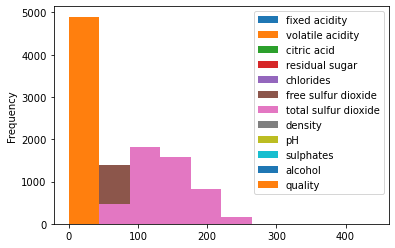

In [26]:
white_wines.plot.hist()

In [27]:
white_wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000